# Supervised Learning Project
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
- Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

### Attribute Information: 
  - ID : Customer ID
  - Age : Customer's age in completed years
  - Experience : #years of professional experience
  - Income : Annual income of the customer
  - ZIP Code : Home Address ZIP code
  - Family : Family size of the customer
  - CCAvg : Avg. spending on credit cards per month
  - Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
  - Mortgage : Value of house mortgage if any
  - Personal_Loan : Did this customer accept the personal loan offered in the last campaign?
  - Securities Account : Does the customer have a securities account with the bank?
  - CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
  - Online : Does the customer use internet banking facilities?
  - Credit card : Does the customer use a credit card issued by UniversalBank?

### Learning Outcomes:

   -  Exploratory Data Analysis
   -  Data Cleaning
   -  Data Visualization
   -  Preparing the data to train a model 
   -  Training and making predictions using a classification model
   -  Model evaluation
    
### Objective:
- The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. Here I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic Regresssion, K-Nearest Neighbors(KNN) and Naive Bayes Algorigthm.


## 1. Exploratory Data Analysis

### 1.1 Import the necessary libraries

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics


### 1.2 Read the data

In [2]:
# Read the dataframe using pandas or import the dataset using pandas df
loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv') 

In [3]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b>Target Column rearrange:- </b> As our Target Column(Personal Loan) is in middle of dataframe so for more convinient I have drop the personal loan column from the original place and appended at last of dataframe.

In [4]:
personal_loan = loan['Personal Loan']
loan.drop(['Personal Loan'], axis=1, inplace = True)
loan['Personal Loan'] = personal_loan
loan.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


#### Observations
- The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
- Target Variable is <b>Personal Loan</b> which describe whether the person has taken loan or not. This is the variable which we need to predict.

Nonimal Varibles :
- ID - Customer ID
- ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Ordinal Categorical variables :
- Family - Number of famlily member of the customer
- Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

Interval Variables :
- Age        - Age of the customer
- Experience - Years of experience of customer has
- Income     - Annula Income of the customer which is in dollars
- CCAvg      - Avg. spending on credit cards per month which in dollars.
- Mortgage    - Value of House Mortgage

Binary Categorical Variable :
- CD Account - Does the customer have CD Account with bank or not?
- Security Account - Does the customer have Security Account with bank or not?
- Online  - Does the customer have Online banking facility with bank or not?
- Credit Card - Does the customer have a credit card issued by Universal Bank or not?
- Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

### 1.3 Shape the data

In [5]:
rows_count, columns_count = loan.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [6]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

#### Observations
- Shape of the dataframe is (5000, 14). There are 5000 rows and 14 columns in the dataset.

### 1.4 Data type of each attribute

In [7]:
loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations
- Here we can see that all the variables are numerical. But the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable which should be in 'category' type.

### 1.5 Check for the null values

In [9]:
#null values
loan.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [10]:
loan.isnull().values.any()

False

In [11]:
val=loan.isnull().values.any()

if val==True:
    print("Missing values present : ", loan.isnull().values.sum())
    loan=loan.dropna()
else:
    print("No missing values present")

No missing values present


<AxesSubplot:>

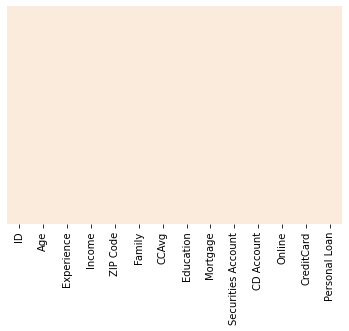

In [12]:
#Missing value Visualization 
sns.heatmap(loan.isna(), yticklabels=False, cbar=False, cmap="rocket_r")

#### Observations
-  From the above heatmap graph we can see that there is no missing value in dataset.

### 1.6 Finding unique data

In [13]:
loan.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

### 1.7 5 point summary of numerical attributes

In [14]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [15]:
#Find Shape
loan.shape

(5000, 14)

In [16]:
#Find Mean
loan.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
Personal Loan             0.096000
dtype: float64

In [17]:
#Find Median
loan.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
Personal Loan             0.0
dtype: float64

In [18]:
#Find Standard Deviation
loan.std()

ID                    1443.520003
Age                     11.463166
Experience              11.467954
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
Personal Loan            0.294621
dtype: float64

#### Observations
- <b>Important : </b>Here we can see that minumum value of Experience column is <b>-3.0</b> which could be a mistake because Experience can not be negative. So I will be fixing it in data cleaning and error fixing part.
- Binary varibales <b>Personal Loan</b>, <b>Credit Card</b>, <b>Online</b>, <b>CD Account</b>, <b>Security Account</b> has clean data.
- Ordinary Cat variables <b>Family</b> and <b>Education</b> are also clean.
- Target variable also looks fine. 

## 2. Study the data distribution in each attribute.

### 2.1 Ploting histogram to check that if data columns are normal or almost normal or not

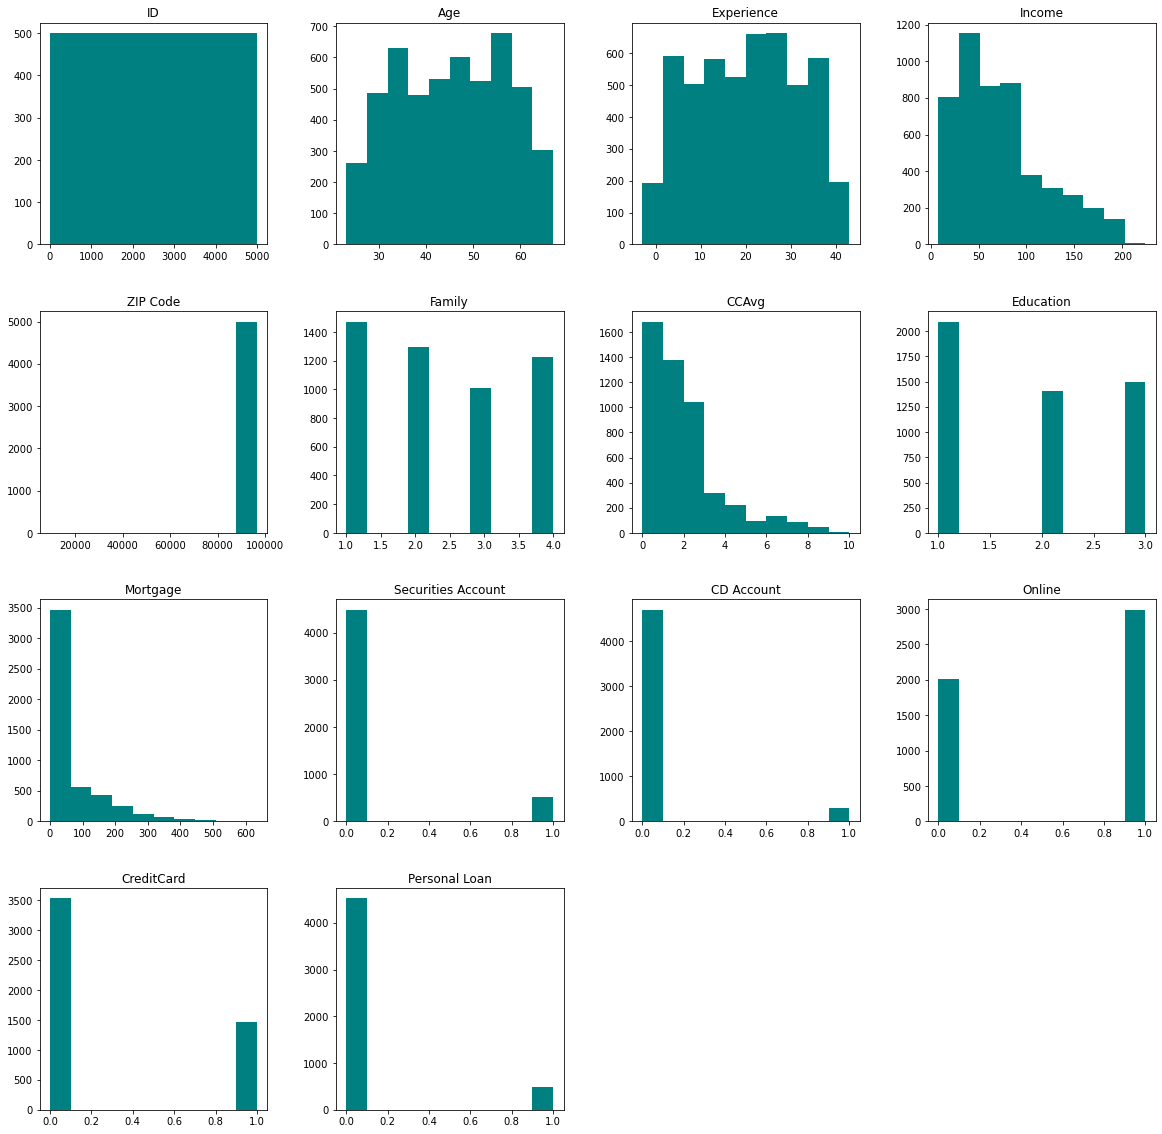

In [19]:
loan.hist(figsize=(20,20),color="teal",grid=False)
plt.show()

### 2.2 Ploting Pairplot

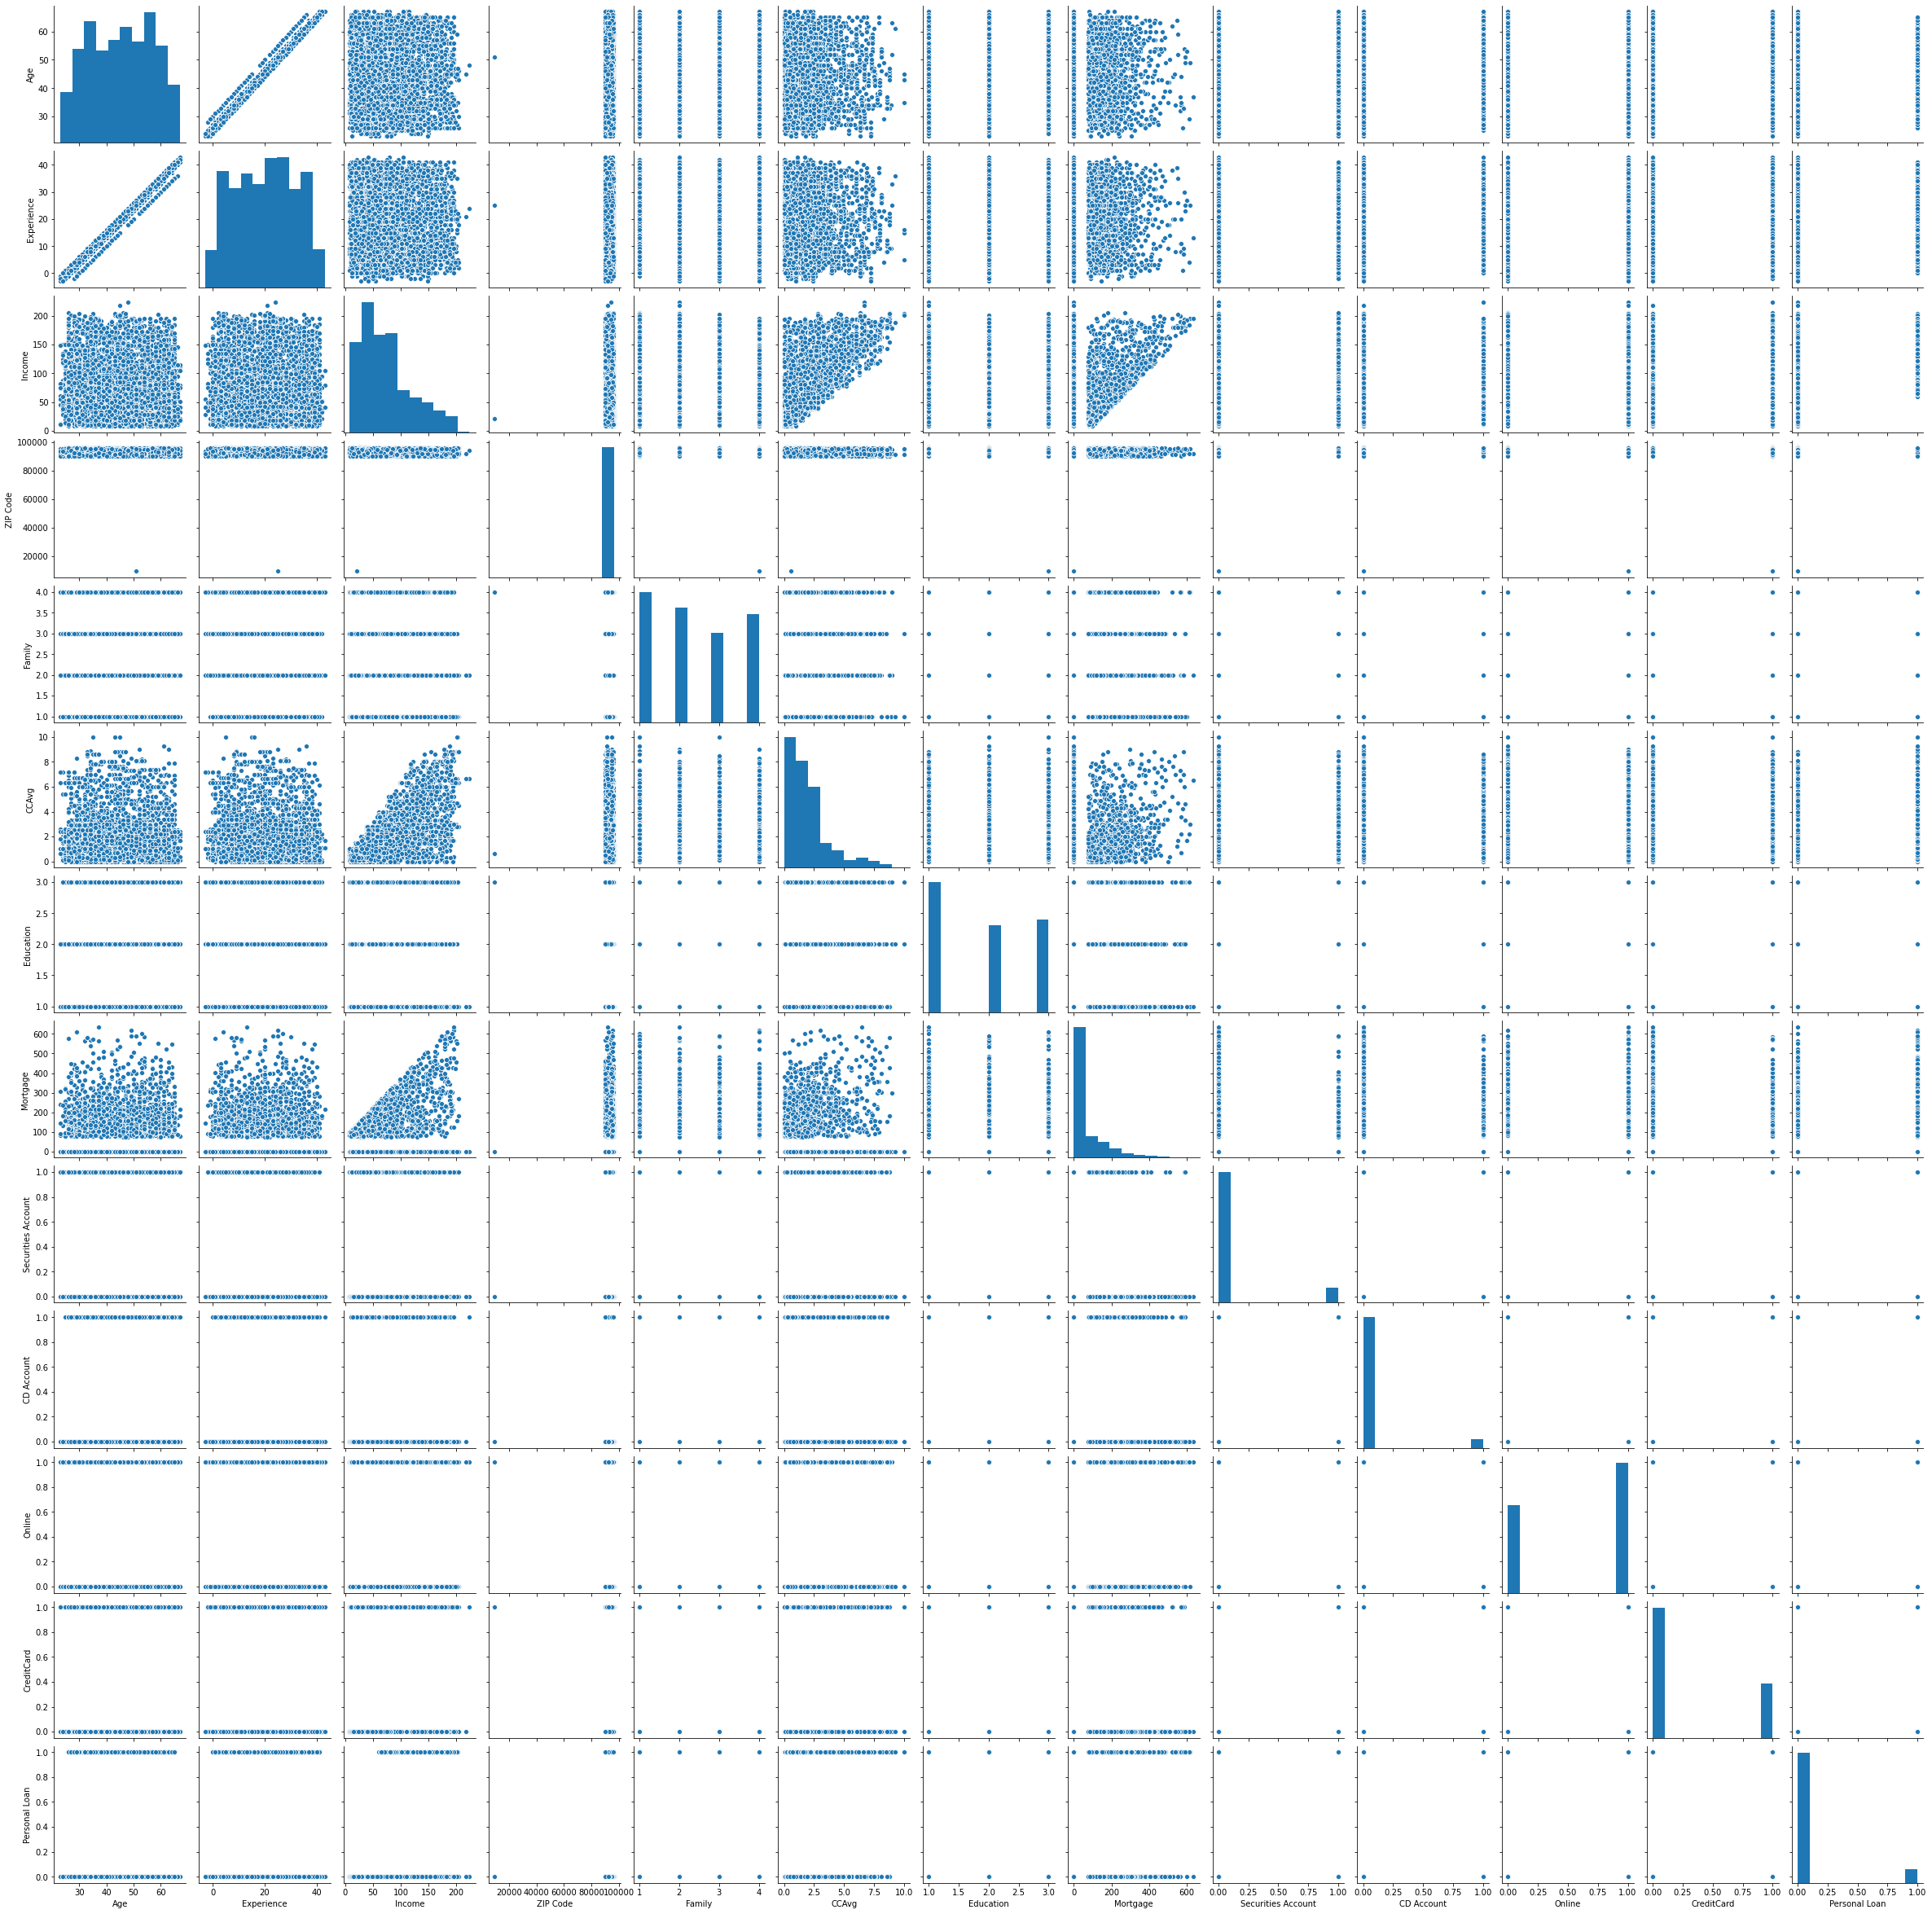

In [20]:
sns.pairplot(loan.iloc[:,1:])
plt.show()

#### Observations
- Here we can see <b>Age</b> feature is almost normally distributed where majority of customers are between age 30 to 60 years. Also we can see median is equal to mean.
- <b>Experience</b> feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
- We can see for <b>Income</b> , <b>CCAvg</b> , <b>Mortgage</b> distribution is positively skewed.
- For <b>Income</b> mean is greater than median.Also we can confirm from this that majority of the customers have income between 45-55K.
- For <b>CCAvg</b> majority of the customers spend less than 2.5K and the average spending is between 0-10K.
- For <b>Mortage</b> we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
- Distributin of <b>Family</b> and <b>Education</b> are evenly distributed.

### 2.3 Cleaning the negative values

In [21]:
# Checking the negative values
loan[loan['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [22]:
# Total records of negative experience
loan[loan['Experience'] < 0]['Experience'].count()

52

#### Observations
- There are 52 records with negative Experience are present in the dataset.

#### 2.3.1 Checking the association of Experience with other quantitive variables

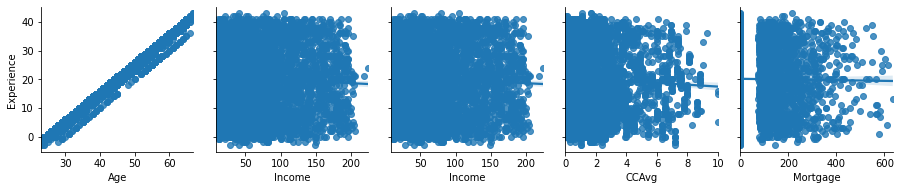

In [23]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(loan, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

#### Observation: 
- By looking above plots we can see that <b>Age</b> has very strong and possitive association with <b>Experience</b>. 
- <b>Decission :</b> We can replace each negative <b>Experience</b> value with the median of possitive <b>Experience</b> associated with the particular <b>Age</b> and <b>Education</b> value.

#### 2.3.2 Check if there are any records still present with negative Experience

In [24]:
loan_Exp = loan.loc[loan['Experience'] >0]
negExp = loan.Experience < 0
column_name = 'Experience'
loan_list = loan.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [25]:
for id in loan_list:
    age = loan.loc[np.where(loan['ID']==id)]["Age"].tolist()[0]
    education = loan.loc[np.where(loan['ID']==id)]["Education"].tolist()[0]
    df_filtered = loan_Exp[(loan_Exp.Age == age) & (loan_Exp.Education == education)]
    exp = df_filtered['Experience'].median()
    loan.loc[loan.loc[np.where(loan['ID']==id)].index, 'Experience'] = exp
    
#The records with the ID, get the values of Age and Education columns.
#Then apply filter for the records matching the criteria from the dataframe 
#which has records with positive experience and take the median.
#Apply the median again to the location(records) which had negative experience.   

In [26]:
loan[loan['Experience'] < 0]['Experience'].count()

0

#### Observations
- Now we can see that negative values count is 0 means there is no negative value anymore in the dataframe.
- Describing the 'Experience' column to check the count, mean, standard deviation and five point summary.

In [27]:
loan.Experience.describe()

count    4971.000000
mean       20.243211
std        11.359189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [28]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


### 2.5 Measure of skewness

In [29]:
loan.skew(axis = 0, skipna = True) 

ID                     0.000000
Age                   -0.029341
Experience            -0.013188
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
Personal Loan          2.743607
dtype: float64

### 2.6 Dist Plot

Text(0.5, 0, 'CreditCard')

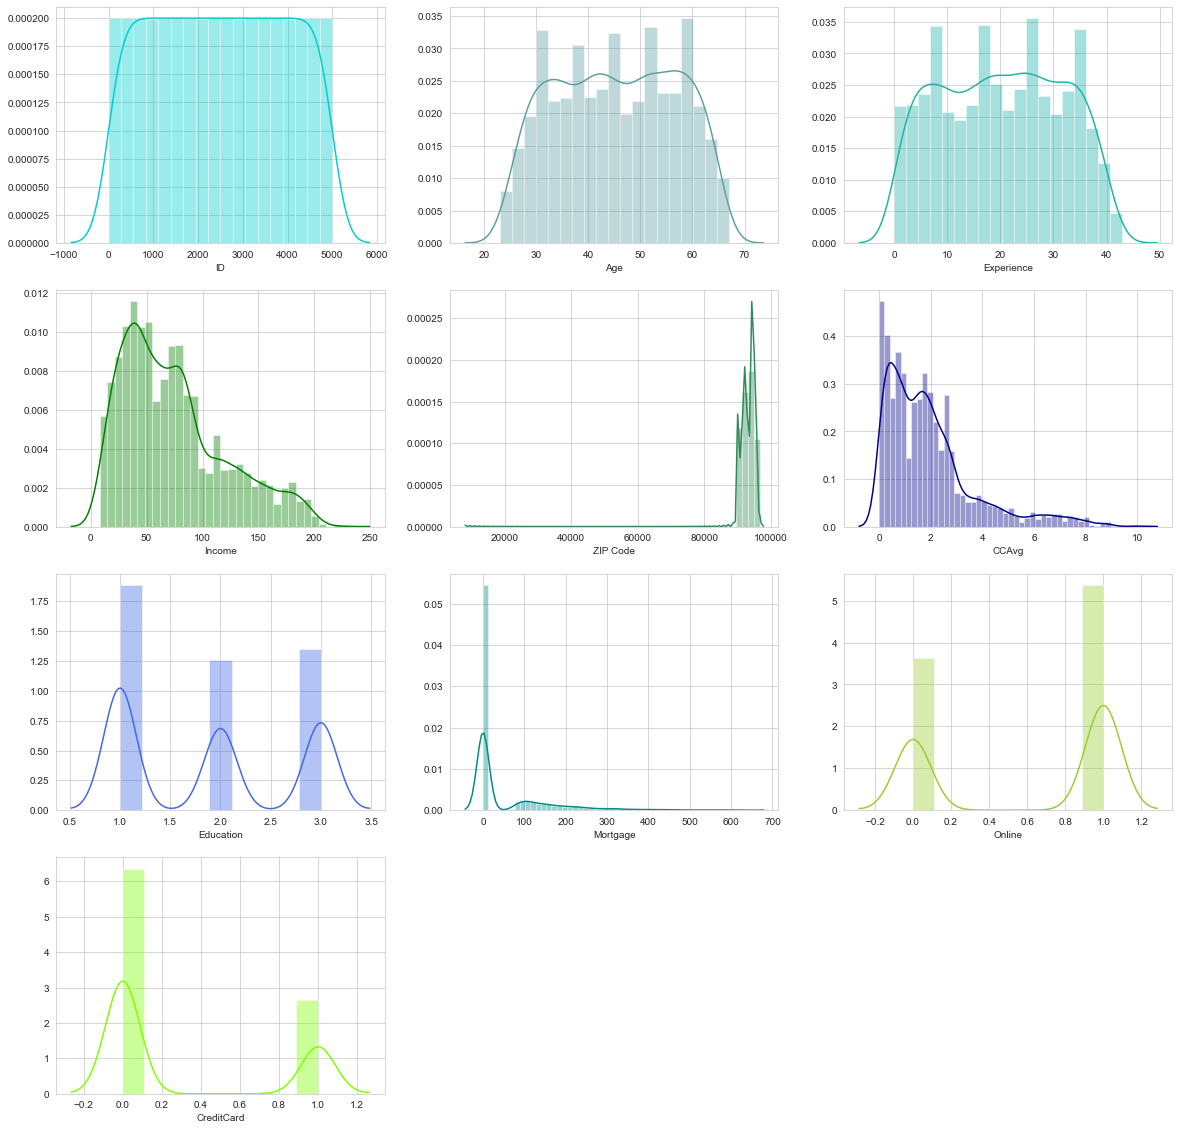

In [30]:
sns.set_style("whitegrid") 
plt.figure(figsize= (20,20))
plt.subplot(4,3,1)
sns.distplot(loan['ID'],color = 'darkturquoise')
plt.xlabel('ID')
plt.subplot(4,3,2)
sns.distplot(loan['Age'],color = 'cadetblue')
plt.xlabel('Age')
plt.subplot(4,3,3)
sns.distplot(loan['Experience'],color = 'lightseagreen')
plt.xlabel('Experience')
plt.subplot(4,3,4)
sns.distplot(loan['Income'],color = 'green')
plt.xlabel('Income')
plt.subplot(4,3,5)
sns.distplot(loan['ZIP Code'],color = 'seagreen')
plt.xlabel('ZIP Code')
plt.subplot(4,3,6)
sns.distplot(loan['CCAvg'],color = 'darkblue')
plt.xlabel('CCAvg')
plt.subplot(4,3,7)
sns.distplot(loan['Education'],color = 'royalblue')
plt.xlabel('Education')
plt.subplot(4,3,8)
sns.distplot(loan['Mortgage'],color = 'darkcyan')
plt.xlabel('Mortgage')
plt.subplot(4,3,9)
sns.distplot(loan['Online'],color = 'yellowgreen')
plt.xlabel('Online')
plt.subplot(4,3,10)
sns.distplot(loan['CreditCard'],color = 'chartreuse')
plt.xlabel('CreditCard')

#### Observation
- In the above graph, <b>ID</b> is uniformaly distributed.
- <b>Age</b> is normaly distributed.
- <b>Experience</b> is also normaly distributed.
- <b>Income</b> is right skewed distribution because the tail goes to the right.
- <b>ZIP Code</b> is uniformaly distrubuted. Data points are more with family size 1 and 2.
- <b>CCAvg</b> is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.
- Undergrad level customers are more than the Graduate and Advanced/Professional customers.
- <b>Mortgage</b> is right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage. 
- <b>Online</b> is a Bernoulli Distrubution. Number of customers who have Online accout is geater than the number of customers who do not have online account.
- <b>CreditCard</b>  is also a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

## 3. Get the target column distribution

### 3.1  Data Visualization with Personal Loan Column

In [31]:
loan_counts = pd.DataFrame(loan["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


#### Observations
- Out of 5000 data points, 4520 are labeled as 0 and 480 as 1. Percentage of customers who took loan is significantlly greater than customers who did not take loan. I have also show the percentage using in pie chart below.

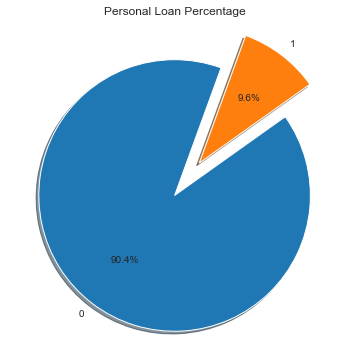

In [32]:
fig1, ax1 = plt.subplots(figsize=(6,6))
explode = (0, 0.30)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

#### Observations
- From the above we can see that the data is having a huge bias(alomot 1:10) towards the category of people not accepting the personal loan. Hence we can build an opinion that our model will tends to perform better towards predicting which customers will not accept the personal loan. However, our goal is to identityfy the customer who can accept the personal loan based on the given features.

### 3.2 Boxplot

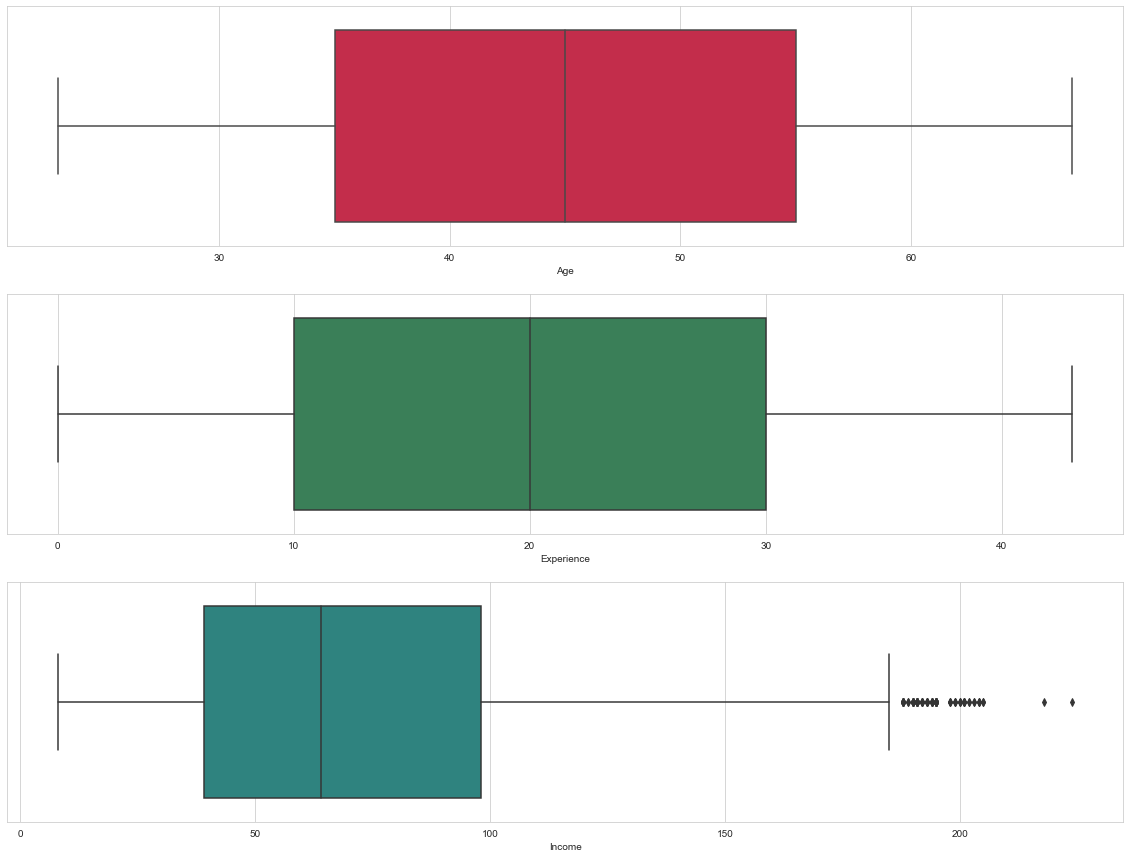

In [33]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=loan.Age, color = 'crimson')

plt.subplot(3,1,2)
sns.boxplot(x= loan.Experience, color = 'seagreen')

plt.subplot(3,1,3)
sns.boxplot(x= loan.Income, palette="viridis")

plt.show()

<AxesSubplot:>

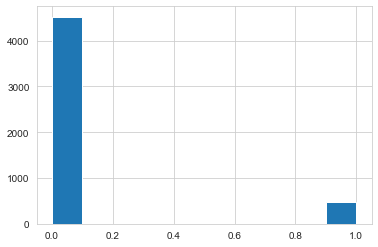

In [34]:
loan['Personal Loan'].hist(bins=10)

<AxesSubplot:xlabel='Education', ylabel='Income'>

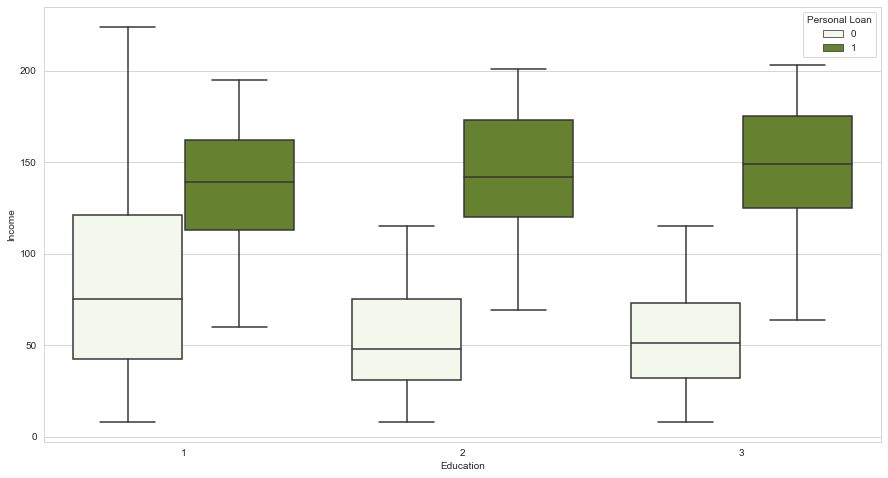

In [35]:
plt.figure(figsize= (15,8))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loan, color = 'olivedrab')

#### Observations
- Here the customers whose education level is 1 is having more income than the others.
- We can see the customers who has taken the Personal Loan have the same Income levels.
- Also the Customers with education levels 2 and 3 have same income level with no Personal Loan.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

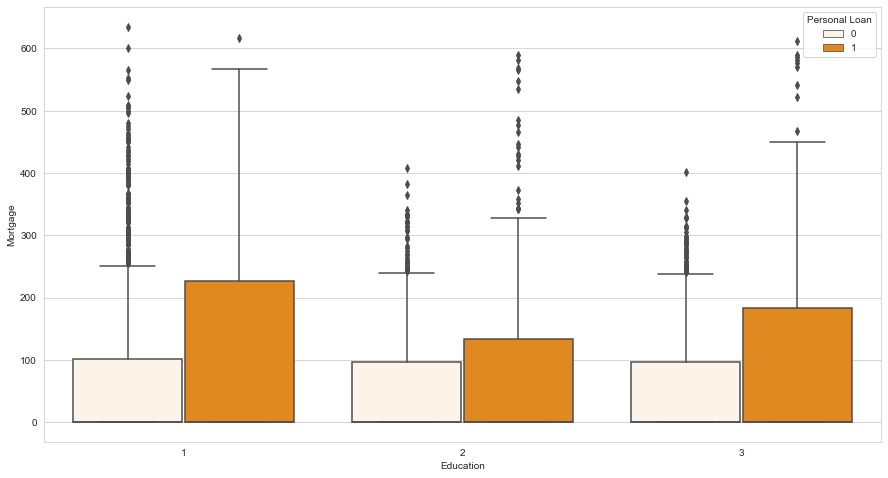

In [36]:
plt.figure(figsize= (15,8))
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loan, color = "darkorange")

#### Observations
- There are so many outliers in each case.
- But the customers with and without Personal Loan have high Mortage.

<AxesSubplot:xlabel='Family', ylabel='Income'>

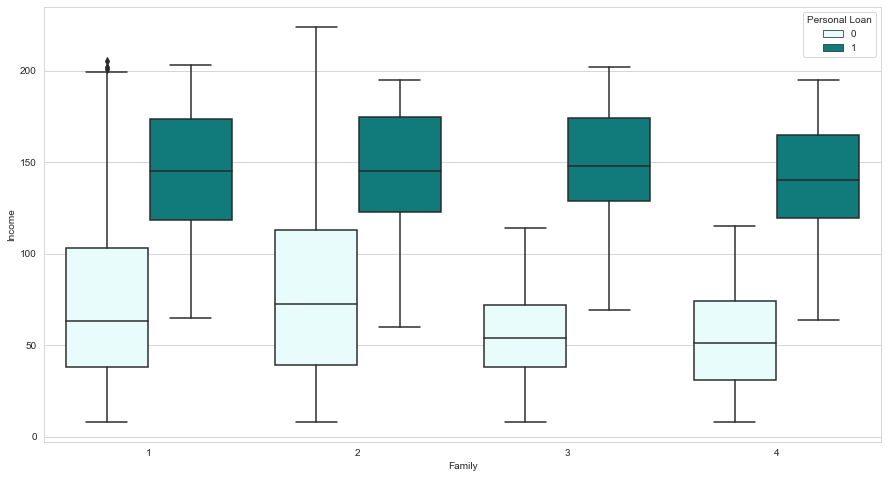

In [37]:
plt.figure(figsize= (15,8))
sns.boxplot(x="Family",y="Income", hue="Personal Loan", data=loan, color = "darkcyan")

#### Observations
- Families with income less than 100K are less likely to take loan,than families with high income.

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

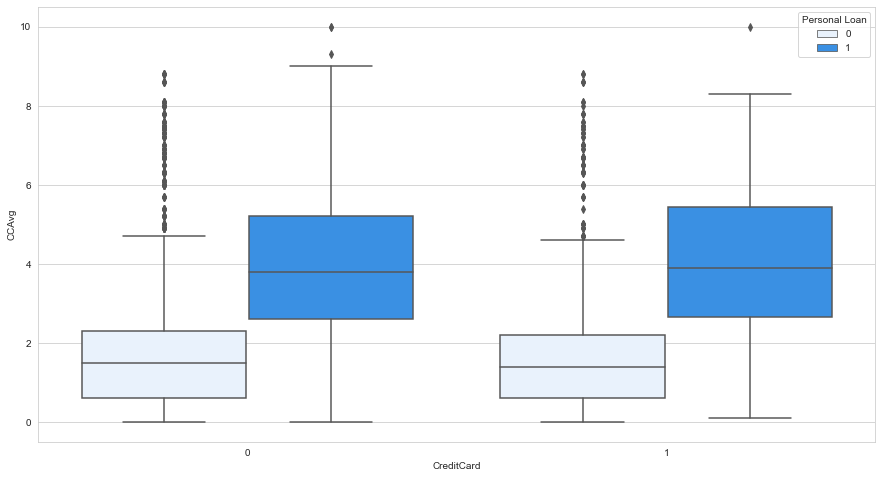

In [38]:
plt.figure(figsize= (15,8))
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=loan, color = "dodgerblue")

#### Observations
- Customers who have credit card and monthly spending is higher are more likly to take loan.

### 3.3 Count Plot

<AxesSubplot:xlabel='Family', ylabel='count'>

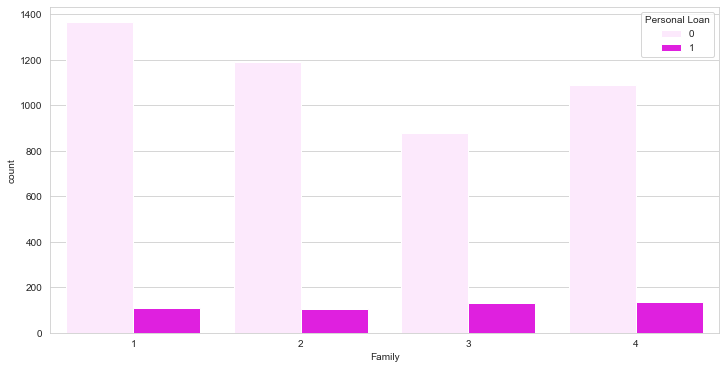

In [39]:
plt.figure(figsize= (12,6))
sns.countplot(x='Family',data=loan,hue='Personal Loan', color = "fuchsia")

#### Observations
- Ther is no that much impact on Personal Loan if we consider Family attribute.
- But the Family with size 3 is taking more Personal Loan as compare to other family size.

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

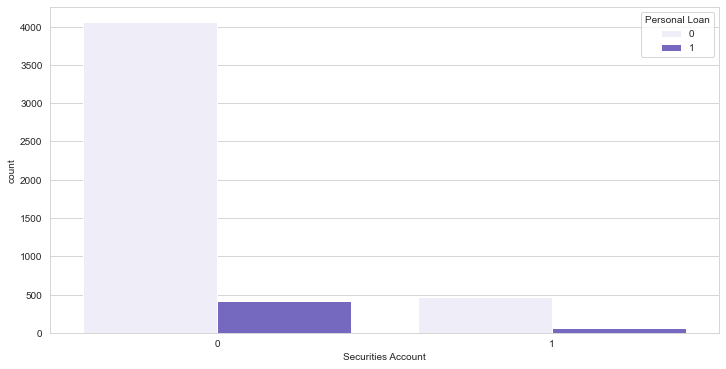

In [40]:
plt.figure(figsize= (12,6))
sns.countplot(x="Securities Account", data=loan,hue="Personal Loan", color = "slateblue")

#### Observations
- The Majority is the customers who do not have Personal Loan have Securities Account.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

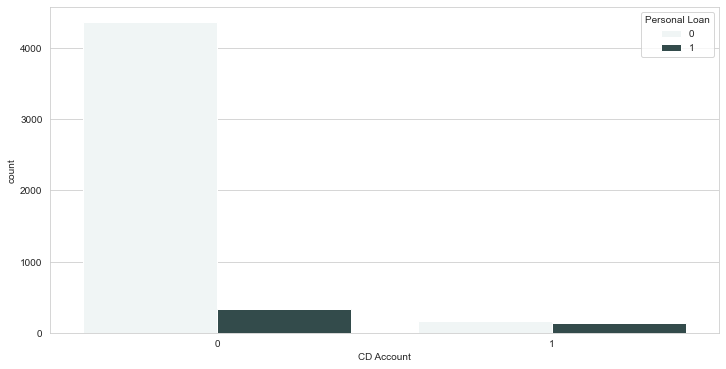

In [41]:
plt.figure(figsize= (12,6))
sns.countplot(x='CD Account',data=loan,hue='Personal Loan', color = "darkslategrey")

#### Observations
- The customers having no CD Account do not have Personal Loan.
- And the customers with CD Account almost have Personal Loan.

<AxesSubplot:xlabel='Online', ylabel='count'>

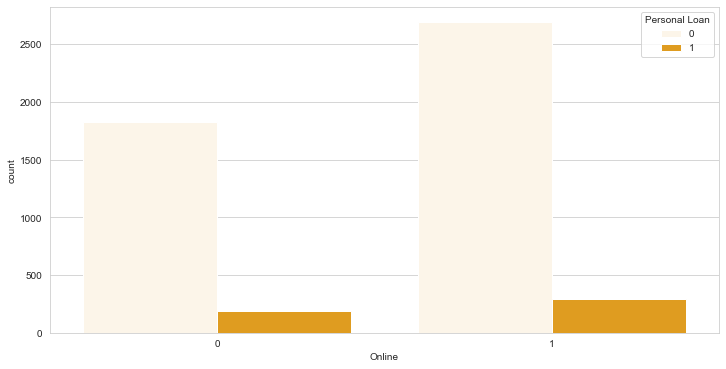

In [42]:
plt.figure(figsize= (12,6))
sns.countplot(x='Online',data=loan,hue='Personal Loan',color = "orange")

#### Observations
- Customers with Personal Loan have less count in both the conditions.

### 3.4 Scatter Plot

<Figure size 864x432 with 0 Axes>

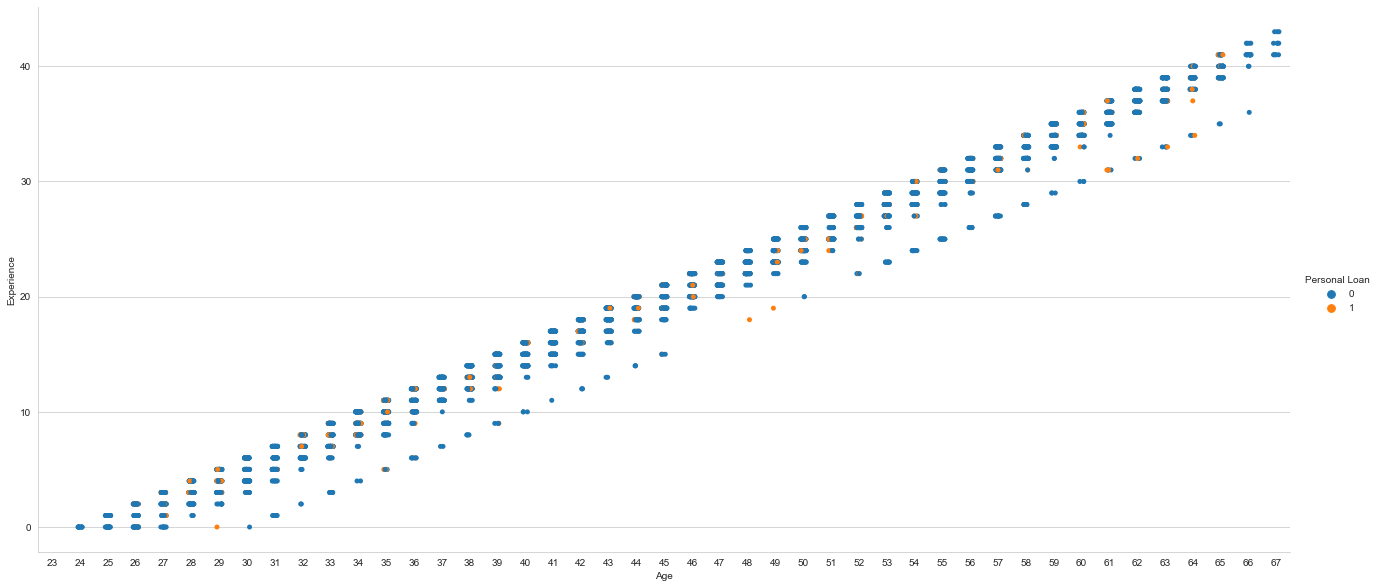

In [43]:
plt.figure(figsize=(12,6))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = loan, height=8.27, aspect=11/5)

#### Observations
- From the above we clearly see that Age and Experience have very storng association. As Age increases Experience also increases. We can try building our model by droping Experience column.

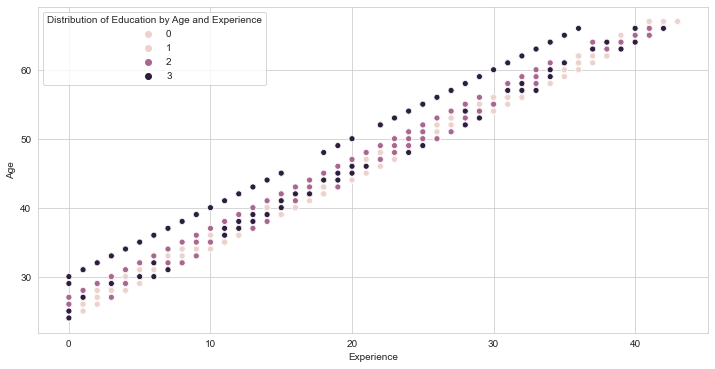

In [44]:
plt.figure(figsize=(12,6))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="Experience", y="Age", hue=loan.Education.tolist(), data=loan)
ax.legend(title='Distribution of Education by Age and Experience')  # add a title to the legend

#### Observations
- Experience and Age gives a positive correlation ,as Experience increases Age also increases.
- We can see with the help of colors of education level that more people are in the under graduate level.

Text(0.5, 1.0, 'CCAvg Distribution')

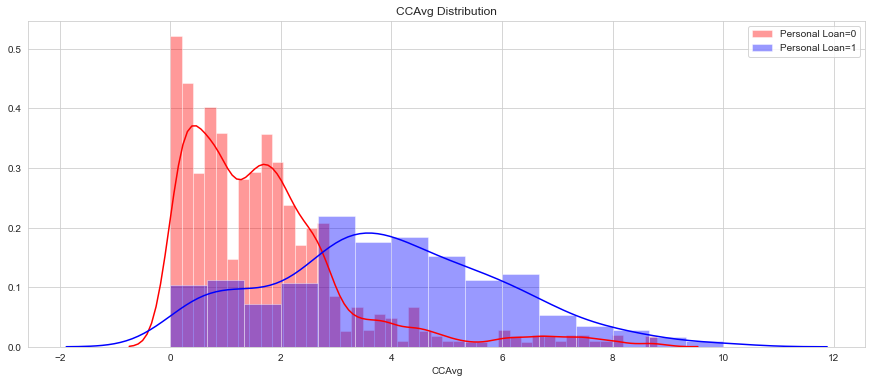

In [45]:
sns.set_style("whitegrid") 
plt.figure(figsize= (15,6))
sns.distplot(loan[loan["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(loan[loan["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

#### Observations
- Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [46]:
print('Credit card spending of Non-Loan customers : ',loan[loan['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', loan[loan['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers :  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0.5, 1.0, 'Income Distribution')

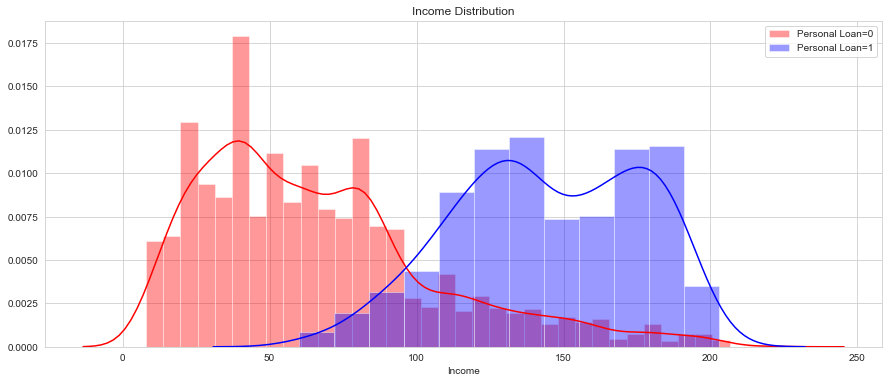

In [47]:
plt.figure(figsize=(15,6))
sns.distplot(loan[loan["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(loan[loan["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

#### Observations
- Customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

### 3.5 Outliers Detection

<AxesSubplot:>

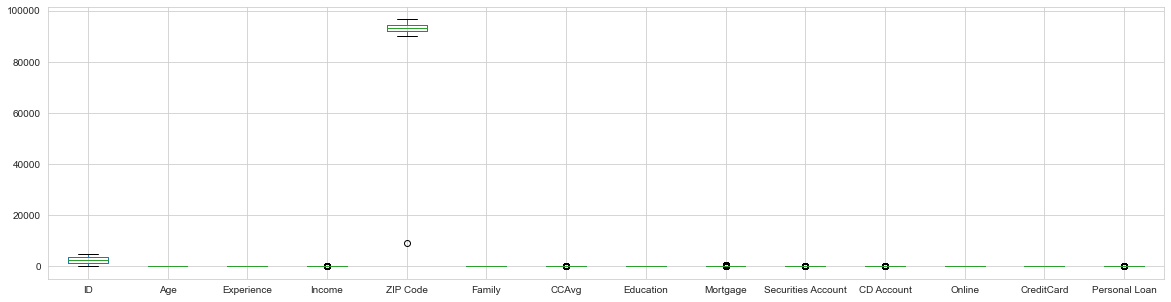

In [48]:
loan.boxplot(return_type='axes', figsize=(20,5))

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'CCAvg'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'CD Account'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'CreditCard'}, xlabel='[Personal Loan]'>],
       [<AxesSubplot:title={'center':'Education'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'Experience'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'Family'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'ID'}, xlabel='[Personal Loan]'>],
       [<AxesSubplot:title={'center':'Income'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'Mortgage'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'Online'}, xlabel='[Personal Loan]'>,
        <AxesSubplot:title={'center':'Securities Account'}, xlabel='[Personal Loan]'>],
       [<AxesSubplot:title={'center':'ZIP Code'}, xlabel='[Personal Loan]'>,

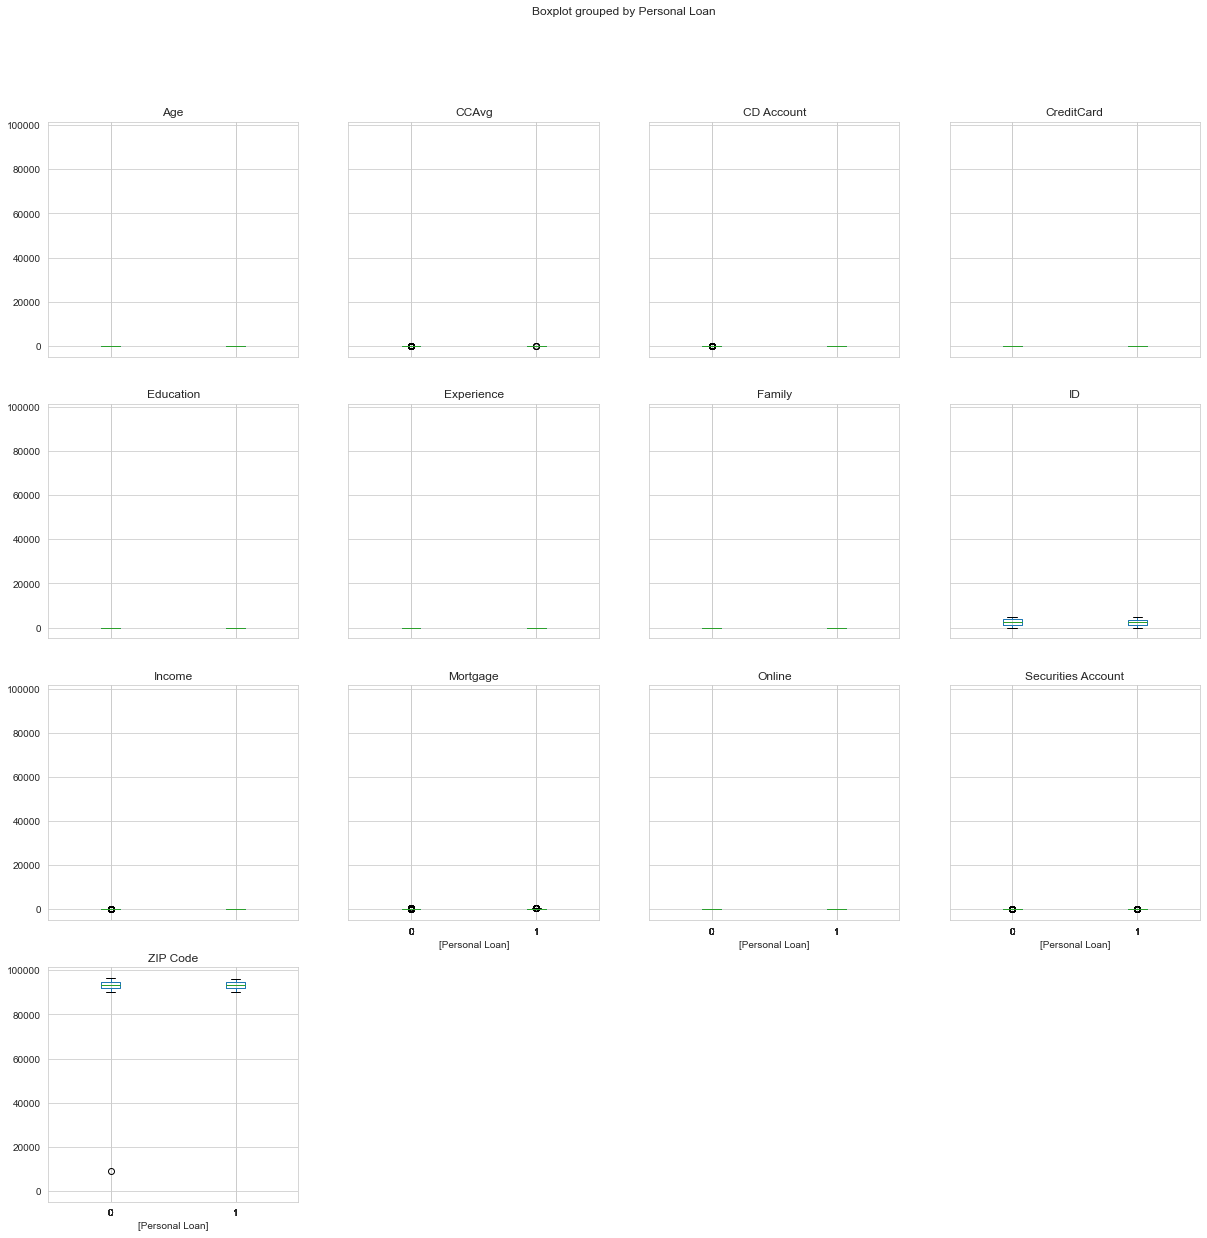

In [49]:
loan.boxplot(by = "Personal Loan",  layout=(4,4),figsize= (20,20))

#### Observations
- From the above boxplot we can see there are outliers on few colomns. Mortgage has more number of outlier. Income, CCAvg have also outliers. We will try to fix the outlier by scaling the attributes.

### 3.6 Calculate the correlation matrix using Heatmap

In [50]:
cor=loan.corr()
cor

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,0.001059,0.007381,0.014501,0.007935,-0.011498
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,0.001059,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


#### 3.6.1 Heatmap

<AxesSubplot:title={'center':'Correlation of Attributes'}>

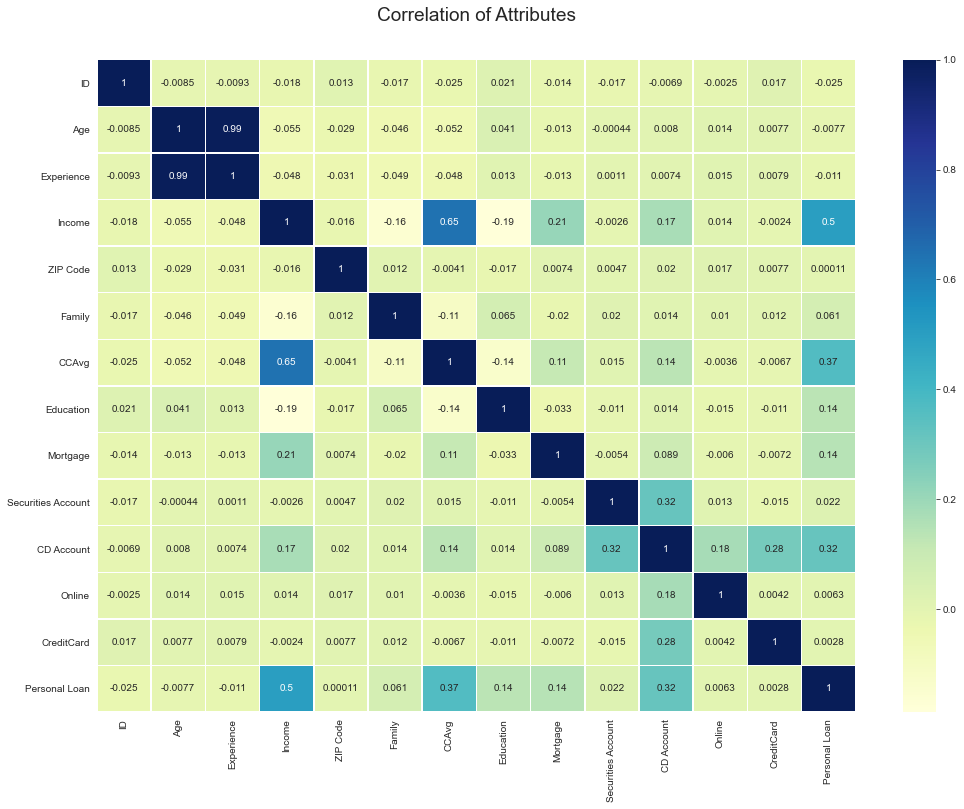

In [51]:
plt.subplots(figsize=(17,12))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")

#### Observations
- Here we can see <b>Age</b> feature is almost normally distributed where majority of customers are between age 30 to 60 years. Also we can see median is equal to mean.
- <b>Experience</b> feature is also almost normally distibuted and mean is also equal to median.But there are some negative values present which should be deleted, as Experience can not be negative.
- We can see for <b>Income</b> , <b>CCAvg</b> , <b>Mortgage</b> distribution is positively skewed.
- For <b>Income</b> mean is greater than median. Also we can confirm from this that majority of the customers have income between 45-55K.
- For <b>CCAvg</b> majority of the customers spend less than 2.5K and the average spending is between 0-10K.
- For <b>Mortgage</b> we can see that almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K.
- Distributin of <b>Family</b> and <b>Education</b> are evenly distributed.
- <b>Income</b> and <b>CCAvg</b> is moderately correlated.
- <b>Experience</b> and <b>Age</b> gives a positive correlation.
- Families with income less than 100K are less likely to take loan,than families with high income.
- The customers whose education level is 1 is having more income than the others.
- The customers with and without Personal Loan have high Mortage.
- Families with income less than 100K are less likely to take loan,than families with high income.
- There is no that much impact on Personal Loan if we consider Family attribute. But the Family with size 3 is taking more Personal loan as compare to other family size.
- The Majority is the customers who do not have Personal loan have Securities Account.
- The customers having no CDAccount do not have Personal loan.
- Customers with Personal Loan have less count in both the conditions.

## 4. Split the data into training and test set in the ratio of 70:30

### 4.1 Dimensionality Reduction
- As we have seen above <b>ID</b>, <b>ZIP Code</b> and <b>Experience</b> are not relevent for our model building so we will drop it.

#### 4.1.1 Dropping 'ID' , 'ZIP Code' and 'Experience'

In [52]:
loan.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0


In [53]:
my_loan=loan.drop(['ID','ZIP Code','Experience'], axis =1 )
my_loan.shape

(5000, 11)

In [54]:
my_loan.head(1)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0


### 4.2 Spliting the data into training and test set in the ratio of 70:30 respectively

In [55]:
my_loan["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [56]:
array = my_loan.values
X = array[:,0:9] # select all rows and first 10 columns which are the attributes
Y = array[:,10]   # select all rows and the 10th column which is the classification "0", "1"
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

### 5.1 Logistic Regression

In [57]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
A = model_score  # Accuracy of Logistic regression model
logestic_confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % A)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)

Logistic Regression Model Accuracy Score W/O Experience  : 0.940000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1333   28]
 [  62   77]]


#### Observations
- From the above accuracy results we see that accuracy with 'Experience' is (93.60 %). 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better with 'Experience'.
- <b>Type 1 (False Possitive)</b> and <b>Type 2(False Negative)</b> errors is less with experience.

#### Improvement of  the model -------- Iteration 2 
- X_train_scaled and X_test_scaled

In [59]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [60]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_test)
scaled_logreg_accuracy = accuracy_score(y_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_test, scaled_logreg_y_predicted)


In [61]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
# Accuracy
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_model_score)
# Confusion Matrix
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])


----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.950000

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1339   22]
 [  53   86]]

True Possitive    =  86
True Negative     =  1339
False Possive     =  22
False Negative    =  53


### 5.2 K-NN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(my_loan))
X_std.columns = my_loan.columns

In [63]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(my_loan.iloc[:,1:11]) 
y = np.array(my_loan['Personal Loan'])

# split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [64]:
print(X_train.shape)
print(y_train.shape)

(3500, 9)
(3500,)


In [65]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 1 : ',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy

print('Accuracy when k = 3 : ',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 5 : ',accuracy_score(y_test, y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 7 : ',accuracy_score(y_test, y_pred))

Accuracy when k = 1 :  0.9106666666666666
Accuracy when k = 3 :  0.9133333333333333
Accuracy when k = 5 :  0.9126666666666666
Accuracy when k = 7 :  0.9086666666666666


In [66]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [67]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


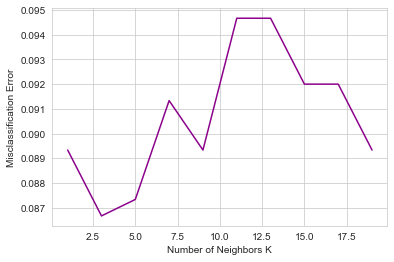

In [68]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE, color = 'darkmagenta')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [69]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
B = accuracy_score(y_test, y_pred)   #Accuracy of KNN model
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [70]:
# Accuracy
print('K-NN Model Accuracy Score W/O Experience  : %f'  % B)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])

K-NN Model Accuracy Score W/O Experience  : 0.913333

K-NN Confusion Matrix W/O Experience: 
 [[1318   43]
 [  87   52]]

True Possitive    =  52
True Negative     =  1318
False Possive     =  43
False Negative    =  87


#### Observations
- From the above accuracy results we see that accuracy without 'Experience' is (94.90%). 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better at without 'Experience'.
- <b>Type 1 (False Possitive)</b> and <b>Type 2(False Negative)</b> errors is less at without Experience.
- Hence we can imporove the accuracy by scalling the attributes.

#### Improvement of the model -------- Iteration 2 

In [71]:
#X_train, X_test, y_train, y_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [72]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

In [73]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scalling K-NN Model Accuracy Score without Experience: 0.966000

After Scalling K-NN Confusion Matrix Without Experience: 
 [[1357    4]
 [  47   92]]

True Possitive    =  92
True Negative     =  1357
False Possive     =  4
False Negative    =  47

K-NN classification Report : 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1361
         1.0       0.96      0.66      0.78       139

    accuracy                           0.97      1500
   macro avg       0.96      0.83      0.88      1500
weighted avg       0.97      0.97      0.96      1500


Accuracy of accepting Loan  :  0.97
precision of accepting Loan :  0.96
recall of accepting Loan    :  0.66
F1 score of accepting Loan  :  0.78


### 5.3 Naïve Bayes

In [74]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [75]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [76]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_train, y_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_test)
gnb_expr_score = gnb_expr_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_expr_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_expr_y_predicted)

In [77]:
#Accuracy
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])

Naïve Bayes Model Accuracy Score W/O Experience  : 0.886667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1247  114]
 [  56   83]]

True Possitive    =  83
True Negative     =  1247
False Possive     =  114
False Negative    =  56


#### Observations
- From the above accuracy results we see that accuracy is alomost at without 'Experience' and with 'Experience'. 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is almost same at without 'Experience'.
- <b>Type I (False Possitive)</b> and <b>Type II(False Negative)</b> errors is same.
- Hence we can imporove the accuracy by scalling the attributes.

#### Improvement of the model -------- Iteration 2

In [78]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

In [79]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_expr_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scalling Naïve Bayes Model Accuracy Score: 0.887333

After Scalling Naïve Bayes Confusion Matrix: 
 [[1247  114]
 [  55   84]]

True Possitive    =  84
True Negative     =  1247
False Possive     =  114
False Negative    =  55

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1361
         1.0       0.42      0.60      0.49       139

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500


Accuracy of accepting Loan   :  0.88
precision of accepting Loan  :  0.42
recall of accepting Loan     :  0.6
F1 score of accepting Loan   :  0.5


## 6. Confusion Matrix for all the above models 

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.950000

True Possitive    =  86
True Negative     =  1339
False Possive     =  22
False Negative    =  53


Confusion Matrix for Logistic Regression



<AxesSubplot:>

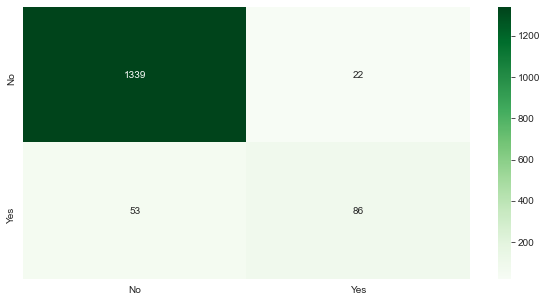

In [80]:
# Accuracy
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_model_score)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print("\n\nConfusion Matrix for Logistic Regression\n")
cm = pd.DataFrame(scaled_logreg_confusion_matrix, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot=True ,fmt='g',cmap="Greens")

After Scalling K-NN Model Accuracy Score without Experience: 0.966000

True Possitive    =  92
True Negative     =  1357
False Possive     =  4
False Negative    =  47


Confusion Matrix for Logistic Regression



<AxesSubplot:>

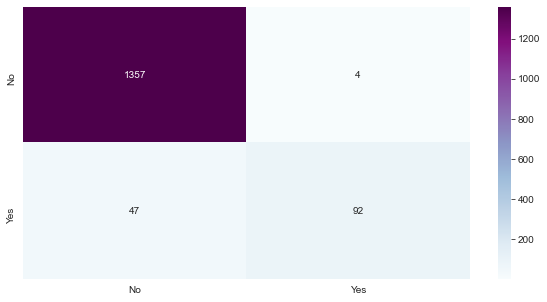

In [81]:
# Accuracy
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print("\n\nConfusion Matrix for Logistic Regression\n")
cm1 = pd.DataFrame(scaled_knn_confusion_matrix, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,5))
sns.heatmap(cm1, annot=True ,fmt='g',cmap="BuPu")

After Scalling Naïve Bayes Model Accuracy Score: 0.887333

True Possitive    =  84
True Negative     =  1247
False Possive     =  114
False Negative    =  55


Confusion Matrix for Logistic Regression



<AxesSubplot:>

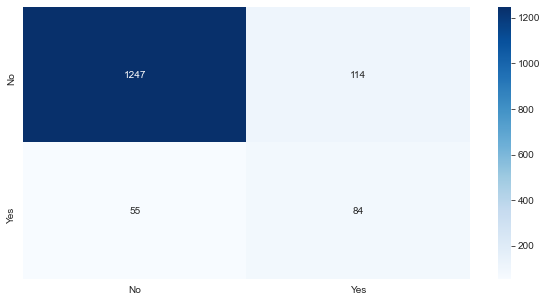

In [82]:
# Accuracy
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])

print("\n\nConfusion Matrix for Logistic Regression\n")
cm2 = pd.DataFrame(scaled_gnb_connfusion_matrix, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (10,5))
sns.heatmap(cm2, annot=True ,fmt='g',cmap="Blues")

## 7. Comparison of Logistic Regression, K-NN and Naïve Bayes

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 97%
Naive Bayes         : 89%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1339   22]
 [  53   86]]

     True Possitive    =  86
     True Negative     =  1339
     False Possive     =  22
     False Negative    =  53

K-Nearest Neighbors: 
 [[1357    4]
 [  47   92]]

    True Possitive    =  92
    True Negative     =  1357
    False Possive     =  4
    False Negative    =  47

Naive Bayes: 
 [[1247  114]
 [  55   84]]

    True Possitive    =  84
    True Negative     =  1247
    False Possive     =  114
    False Negative    =  55


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


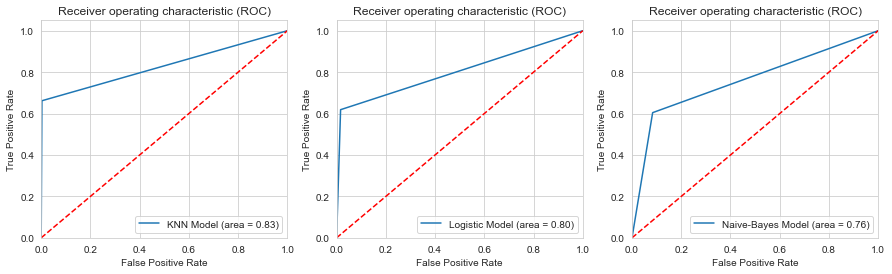

In [83]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_model_score * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Observations
- From the above, we can clearly see that k-Nearest Neighbors Alogorithm with scaled data gives us best accuracy of 97%.
- Also the Type I(False Posssitive) and Type II(False Negative) errors are least in K-Nearest model.
- The area in ROC curve for K-NN is 0.83 which is close to 1 which stats that K-NN is the best model in comparesion of Logistic Model and Naive-Bayes Model whose ROC area is 0.80 and 0.76 repectively.
- Hence among the above three algorithm applied on the underline dataset, K-NN would be the best choice to predict the customers who will accept the personal loan.

## ----------------------------------------------------------END-----------------------------------------------------------------